<>:15: SyntaxWarning: invalid escape sequence '\s'
<>:15: SyntaxWarning: invalid escape sequence '\s'
/var/folders/_f/m2dfym5j1ll7gkhrsgfplwpr0000gn/T/ipykernel_60146/845750037.py:15: SyntaxWarning: invalid escape sequence '\s'
  data = pd.read_csv('vertebral_column_data.txt', sep='\s+', header=None, names=columns)


First 5 rows of the raw data:
   pelvic_incidence  pelvic_tilt  lumbar_lordosis_angle  sacral_slope  \
0             63.03        22.55                  39.61         40.48   
1             39.06        10.06                  25.02         29.00   
2             68.83        22.22                  50.09         46.61   
3             69.30        24.65                  44.31         44.64   
4             49.71         9.65                  28.32         40.06   

   pelvic_radius  grade_spondylolisthesis class  
0          98.67                    -0.25    AB  
1         114.41                     4.56    AB  
2         105.99                    -3.53    AB  
3         101.87                    11.21    AB  
4         108.17                     7.92    AB  

Descriptive statistics:
       pelvic_incidence  pelvic_tilt  lumbar_lordosis_angle  sacral_slope  \
count        310.000000   310.000000             310.000000    310.000000   
mean          60.496484    17.542903              51

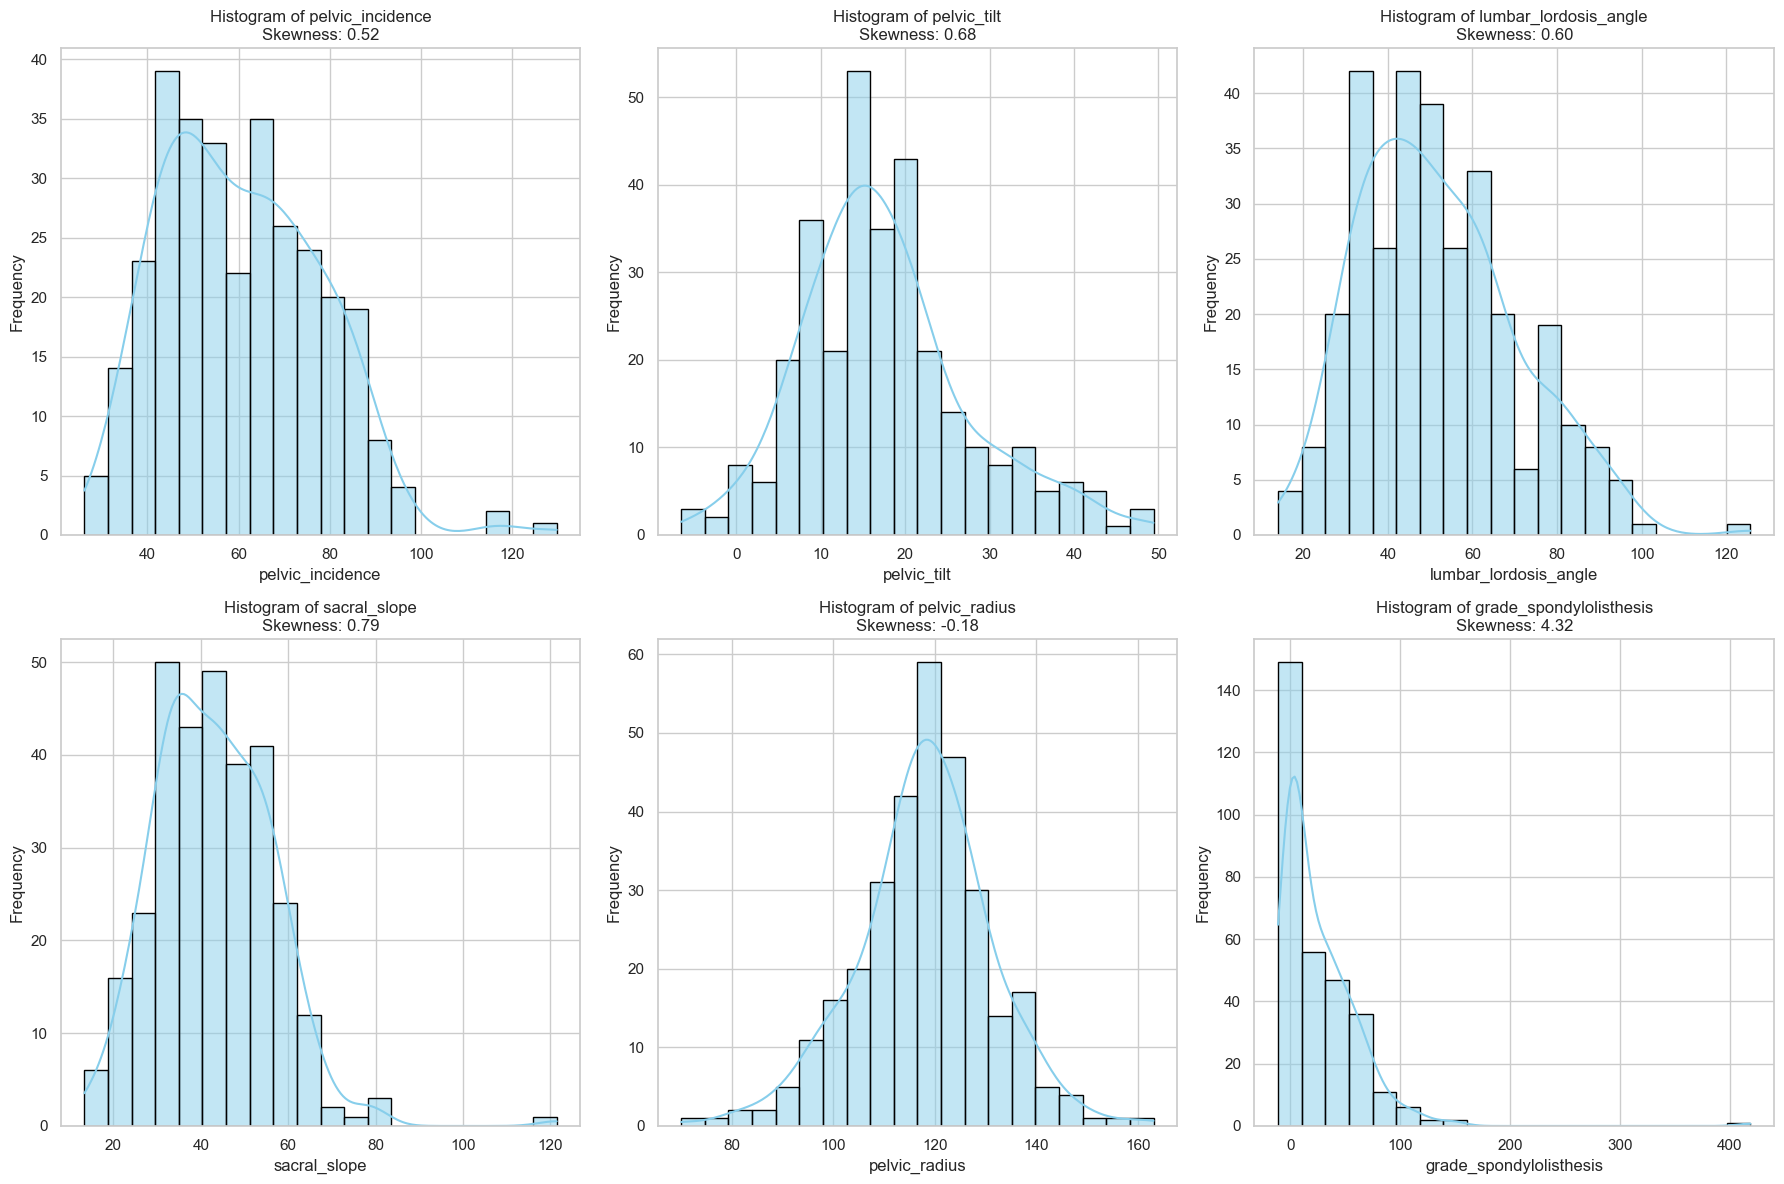

/var/folders/_f/m2dfym5j1ll7gkhrsgfplwpr0000gn/T/ipykernel_60146/845750037.py:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='class', y=feature, data=data, palette='Set2')
/var/folders/_f/m2dfym5j1ll7gkhrsgfplwpr0000gn/T/ipykernel_60146/845750037.py:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='class', y=feature, data=data, palette='Set2')
/var/folders/_f/m2dfym5j1ll7gkhrsgfplwpr0000gn/T/ipykernel_60146/845750037.py:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='class', y=feature, data=data, palette='Set2')
/var/folders/_f/

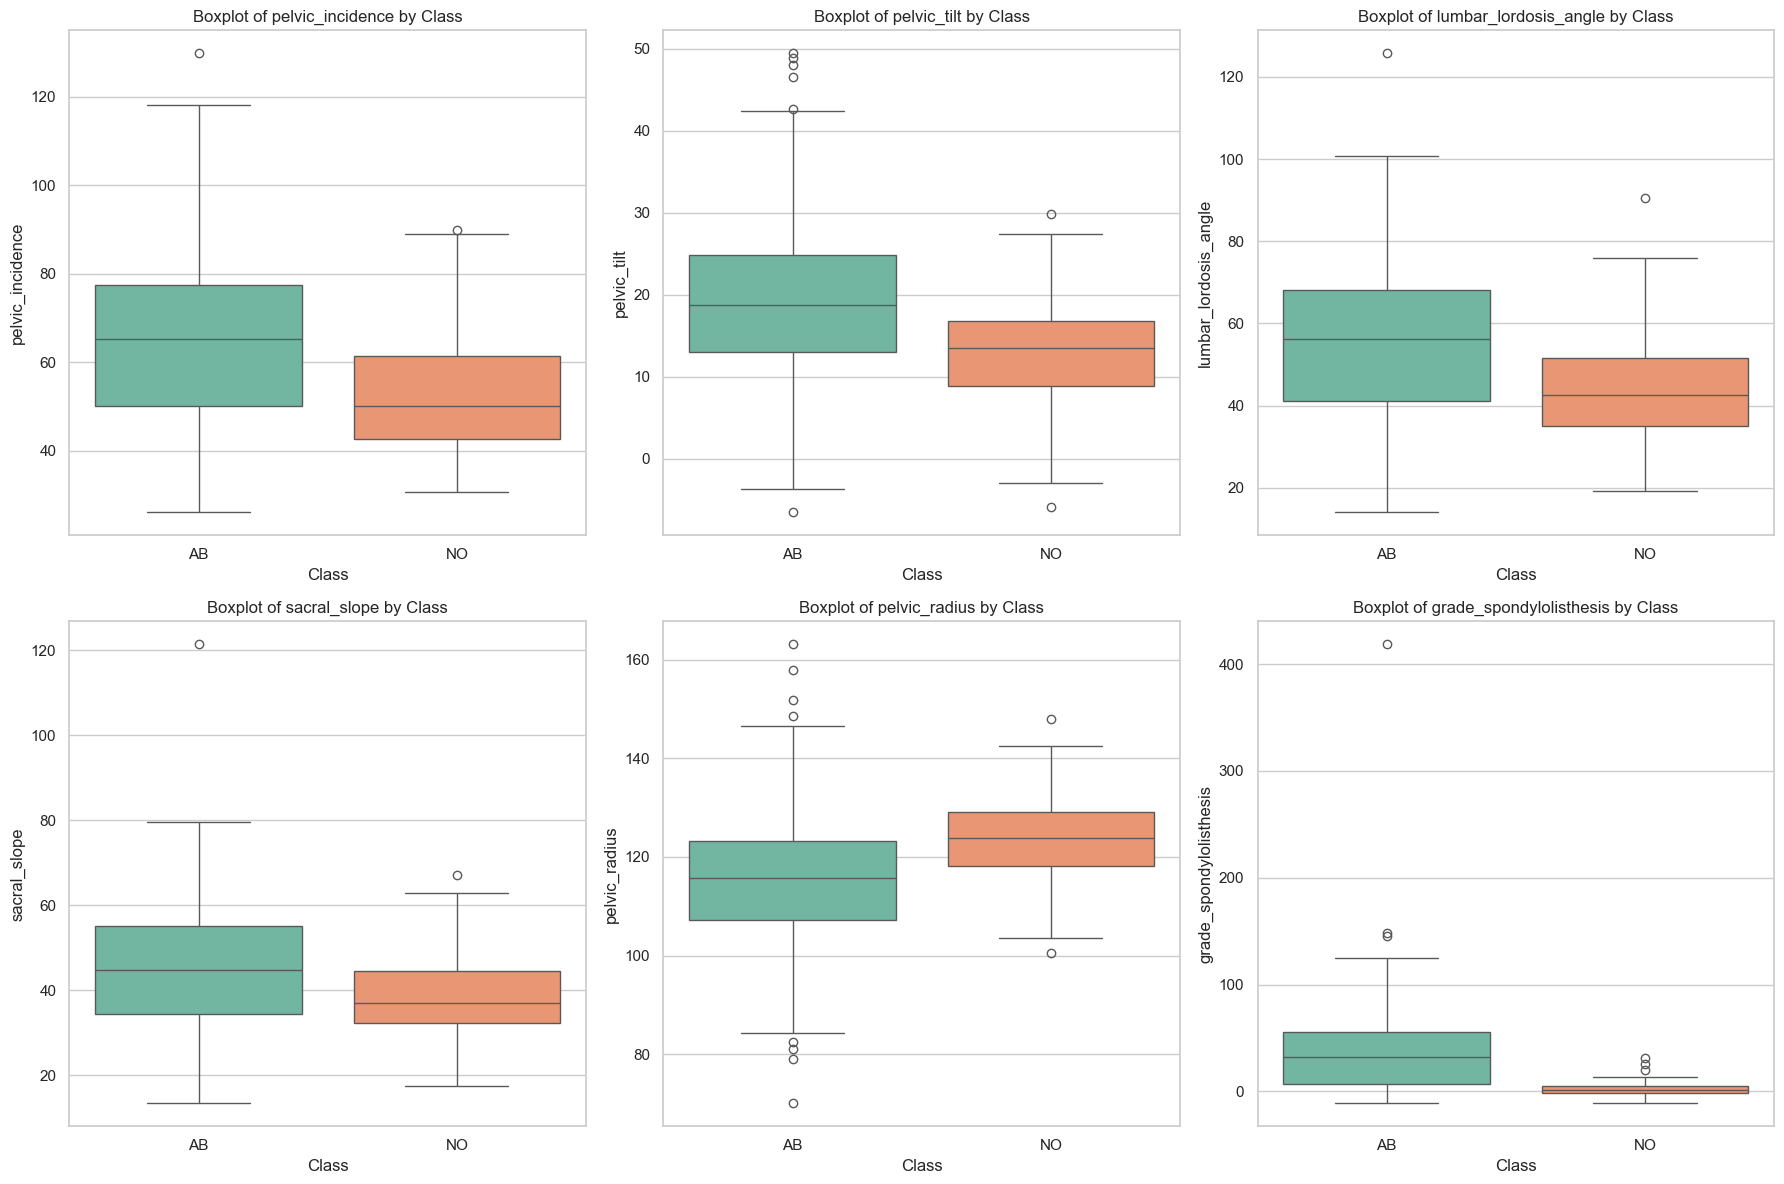

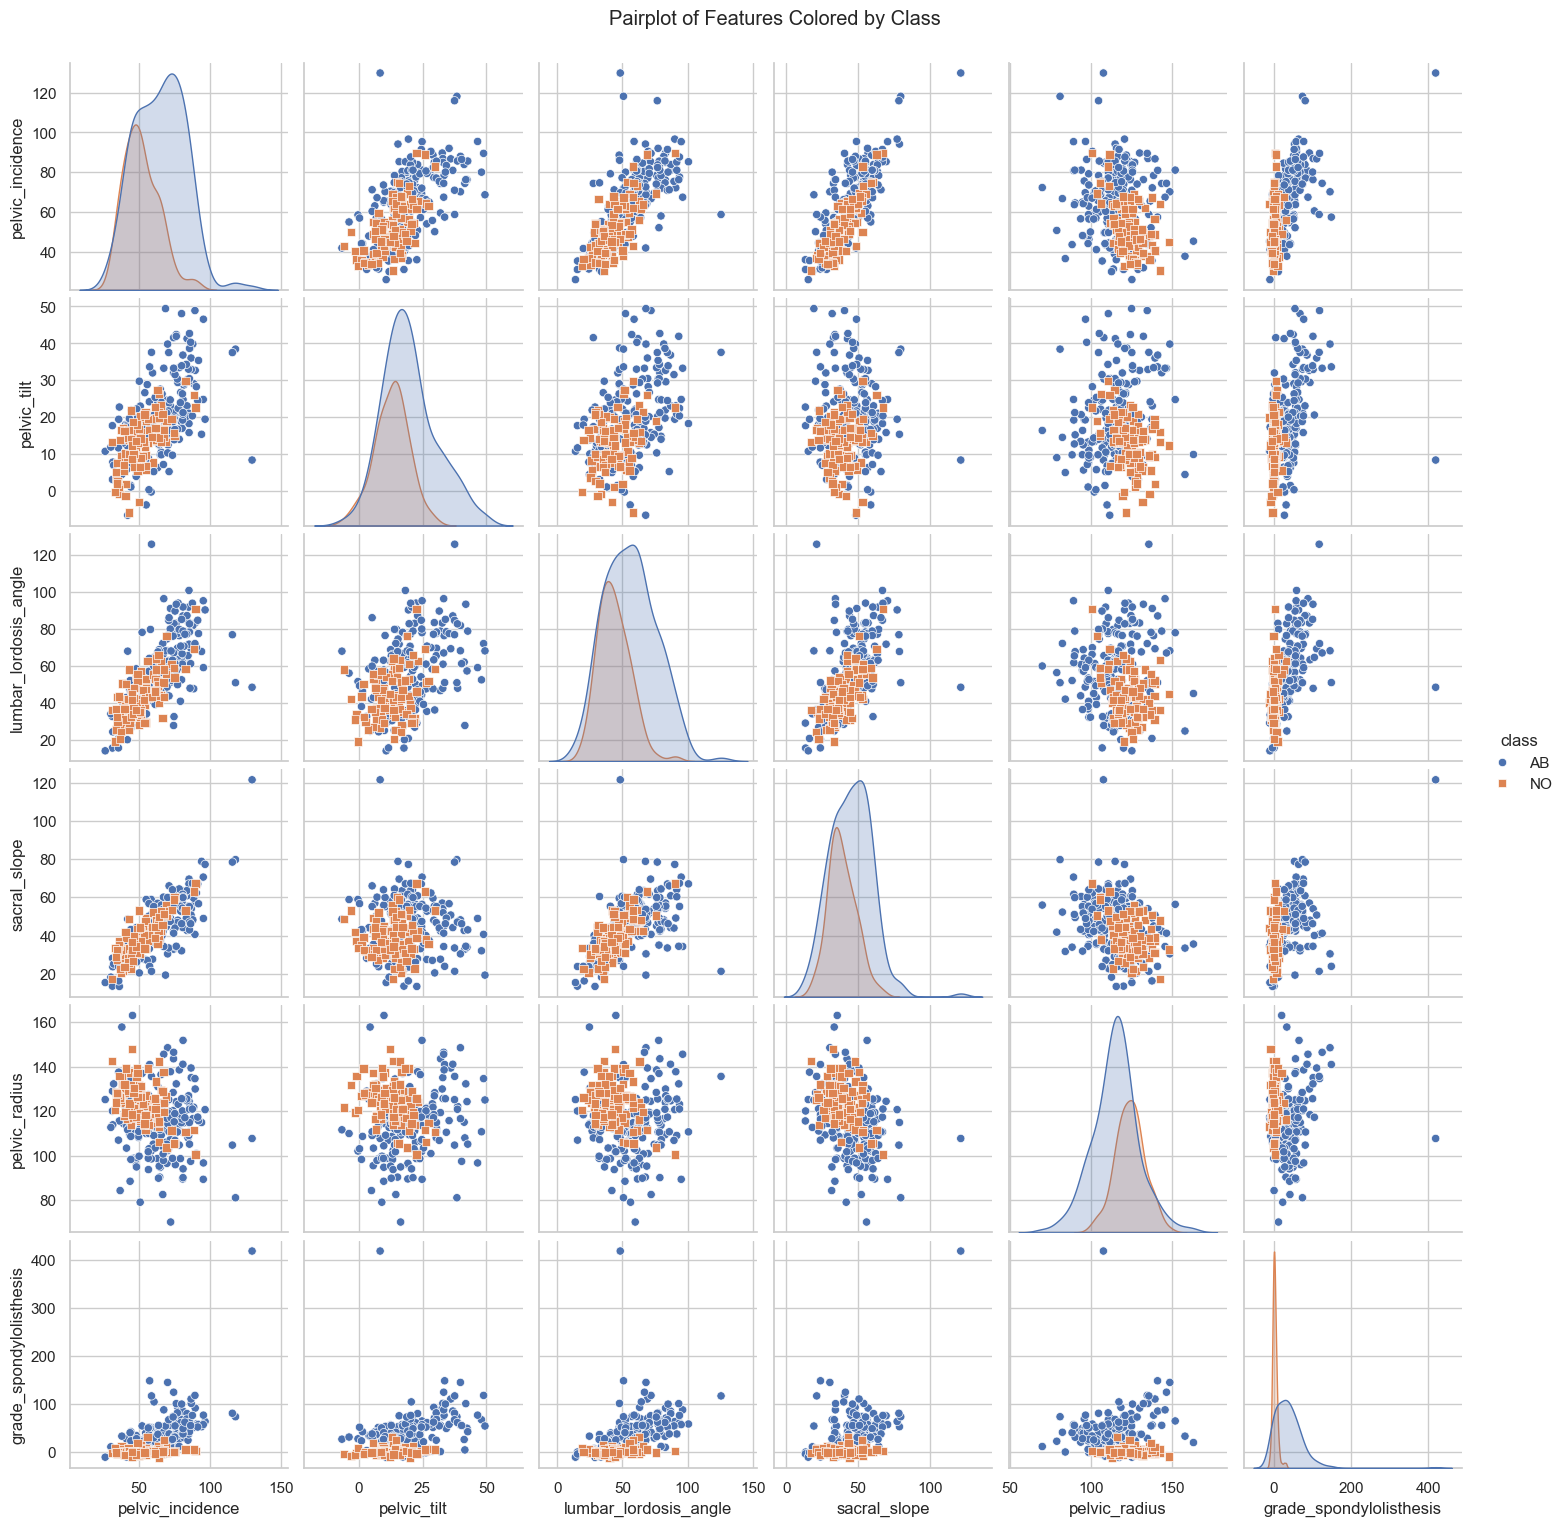


Pearson Correlation Matrix:
                         pelvic_incidence  pelvic_tilt  lumbar_lordosis_angle  \
pelvic_incidence                 1.000000     0.629186               0.717286   
pelvic_tilt                      0.629186     1.000000               0.432760   
lumbar_lordosis_angle            0.717286     0.432760               1.000000   
sacral_slope                     0.814959     0.062327               0.598389   
pelvic_radius                   -0.247484     0.032660              -0.080368   
grade_spondylolisthesis          0.638733     0.397840               0.533665   

                         sacral_slope  pelvic_radius  grade_spondylolisthesis  
pelvic_incidence             0.814959      -0.247484                 0.638733  
pelvic_tilt                  0.062327       0.032660                 0.397840  
lumbar_lordosis_angle        0.598389      -0.080368                 0.533665  
sacral_slope                 1.000000      -0.342147                 0.523571  
pel

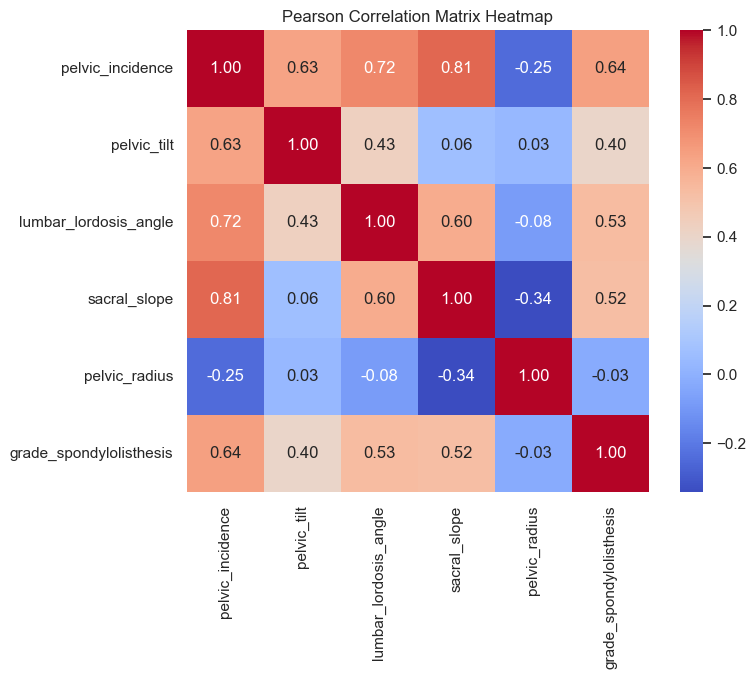


Outlier detection using IQR method:
pelvic_incidence: 3 outliers detected (Lower: 6.76, Upper: 112.55)
pelvic_tilt: 13 outliers detected (Lower: -6.51, Upper: 39.30)
lumbar_lordosis_angle: 1 outliers detected (Lower: -2.00, Upper: 102.00)
sacral_slope: 1 outliers detected (Lower: 4.33, Upper: 81.71)
pelvic_radius: 11 outliers detected (Lower: 88.57, Upper: 147.60)
grade_spondylolisthesis: 10 outliers detected (Lower: -57.93, Upper: 100.81)

First 5 rows of the standardized data:
   pelvic_incidence  pelvic_tilt  lumbar_lordosis_angle  sacral_slope  \
0          0.147227     0.501111              -0.665128     -0.184602   
1         -1.245707    -0.748891              -1.452763     -1.041250   
2          0.484273     0.468085              -0.099370      0.272823   
3          0.511586     0.711280              -0.411401      0.125820   
4         -0.626819    -0.789923              -1.274614     -0.215943   

   pelvic_radius  grade_spondylolisthesis class  
0      -1.447831          

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Set seaborn style for better aesthetics
sns.set(style="whitegrid")

# Define column names: 6 biomechanical features and 1 class label
columns = ['pelvic_incidence', 'pelvic_tilt', 'lumbar_lordosis_angle',
           'sacral_slope', 'pelvic_radius', 'grade_spondylolisthesis', 'class']

# Load the dataset (assuming whitespace-separated values, no header in file)
data = pd.read_csv('vertebral_column_data.txt', sep='\s+', header=None, names=columns)

# Display the first few rows of the raw data
print("First 5 rows of the raw data:")
print(data.head())

# Display basic descriptive statistics of the dataset
print("\nDescriptive statistics:")
print(data.describe())

# Check class balance between AB and NO
print("\nClass balance (AB vs NO):")
print(data['class'].value_counts())

# --------------------------
# Histograms for each feature to inspect distribution and skewness
# --------------------------
plt.figure(figsize=(18, 12))
for i, feature in enumerate(columns[:-1]):  # Exclude the class label
    plt.subplot(2, 3, i + 1)
    sns.histplot(data[feature], bins=20, kde=True, color='skyblue', edgecolor='black')
    # Calculate skewness for the feature
    skewness = data[feature].skew()
    plt.title(f'Histogram of {feature}\nSkewness: {skewness:.2f}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# --------------------------
# Box plots for each feature grouped by class (AB vs NO)
# --------------------------
plt.figure(figsize=(18, 12))
for i, feature in enumerate(columns[:-1]):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(x='class', y=feature, data=data, palette='Set2')
    plt.title(f'Boxplot of {feature} by Class')
    plt.xlabel('Class')
    plt.ylabel(feature)
plt.tight_layout()
plt.show()

# --------------------------
# Pairplot to visualize pairwise relationships, colored by class
# --------------------------
sns.pairplot(data, hue='class', diag_kind='kde', markers=["o", "s"])
plt.suptitle("Pairplot of Features Colored by Class", y=1.02)
plt.show()

# --------------------------
# Compute Pearson correlation matrix and visualize as heatmap
# --------------------------
features = columns[:-1]  # Only feature columns
corr_matrix = data[features].corr(method='pearson')
print("\nPearson Correlation Matrix:")
print(corr_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Pearson Correlation Matrix Heatmap")
plt.show()

# --------------------------
# Outlier detection using the IQR method for each feature
# --------------------------
print("\nOutlier detection using IQR method:")
for feature in features:
    Q1 = data[feature].quantile(0.25)
    Q3 = data[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Identify outliers
    outliers = data[(data[feature] < lower_bound) | (data[feature] > upper_bound)]
    print(f'{feature}: {outliers.shape[0]} outliers detected (Lower: {lower_bound:.2f}, Upper: {upper_bound:.2f})')

# Optional: Check for negative values in features that should be non-negative
# (For example: pelvic_incidence, pelvic_tilt, lumbar_lordosis_angle, sacral_slope, pelvic_radius)
for feature in ['pelvic_incidence', 'pelvic_tilt', 'lumbar_lordosis_angle', 'sacral_slope', 'pelvic_radius']:
    negative_count = (data[feature] < 0).sum()
    if negative_count > 0:
        print(f'Warning: {negative_count} negative values detected in {feature} (expected non-negative values)')

# --------------------------
# Standardize features using Z-score normalization due to differences in measurement scales
# --------------------------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data[features])
data_scaled = pd.DataFrame(X_scaled, columns=features)
# Append the class label to the standardized DataFrame
data_scaled['class'] = data['class'].values

print("\nFirst 5 rows of the standardized data:")
print(data_scaled.head())
